In [1]:
import numpy as np
import pandas as pd

In [45]:
import warnings
warnings.filterwarnings('ignore')

# 8-9주차 (ROC, AUC, RF, DT)

In [2]:
data = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 와인 퀄리티(라벨) 값을 3, 4, 5는 0으로 6, 7, 8 은 1로 대체

In [25]:
data.quality.replace({3:0, 4:0, 5:0}, inplace=True)

data.quality.replace({6:1, 7:1, 8:1}, inplace=True)

### 데이터 분리

In [28]:
X = data.drop(['quality'], axis=1)
y = data[['quality']]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Decision Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

<ipython-input-31-848a737d08dc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


# 성능평가

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print('confusion_matrix_DT', '\n', confusion_matrix(y_test, y_pred_dt))
print('\n', 'confusion_matrix_RF', '\n', confusion_matrix(y_test, y_pred_rf))

print('\nacc_dt', accuracy_score(y_test, y_pred_dt))
print('\nacc_rf', accuracy_score(y_test, y_pred_rf))

print('\n< classification_report_dt >\n', classification_report(y_test, y_pred_dt))
print('\n< classification_report_rf >\n', classification_report(y_test, y_pred_rf))

confusion_matrix_DT 
 [[135  57]
 [ 52 156]]

 confusion_matrix_RF 
 [[159  33]
 [ 42 166]]

acc_dt 0.7275

acc_rf 0.8125

< classification_report_dt >
               precision    recall  f1-score   support

           0       0.72      0.70      0.71       192
           1       0.73      0.75      0.74       208

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.73       400
weighted avg       0.73      0.73      0.73       400


< classification_report_rf >
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       192
           1       0.83      0.80      0.82       208

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400



# n_estimators 변경 for

In [50]:
scores = []
for i in range(10, 500, 5):
    RF = RandomForestClassifier(n_estimators=i, random_state=0)
    RF.fit(X_train, y_train)
    att = RF.predict(X_test)
    acc = accuracy_score(y_test, att)
    scores.append(acc)
    print('>%d, acc: %.3f' % (i, acc))

>10, acc: 0.805
>15, acc: 0.805
>20, acc: 0.812
>25, acc: 0.815
>30, acc: 0.820
>35, acc: 0.820
>40, acc: 0.815
>45, acc: 0.820
>50, acc: 0.823
>55, acc: 0.820
>60, acc: 0.820
>65, acc: 0.820
>70, acc: 0.825
>75, acc: 0.820
>80, acc: 0.823
>85, acc: 0.823
>90, acc: 0.820
>95, acc: 0.820
>100, acc: 0.812
>105, acc: 0.812
>110, acc: 0.812
>115, acc: 0.815
>120, acc: 0.815
>125, acc: 0.812
>130, acc: 0.812
>135, acc: 0.818
>140, acc: 0.815
>145, acc: 0.818
>150, acc: 0.812
>155, acc: 0.807
>160, acc: 0.815
>165, acc: 0.815
>170, acc: 0.815
>175, acc: 0.815
>180, acc: 0.815
>185, acc: 0.812
>190, acc: 0.815
>195, acc: 0.812
>200, acc: 0.815
>205, acc: 0.812
>210, acc: 0.807
>215, acc: 0.812
>220, acc: 0.807
>225, acc: 0.805
>230, acc: 0.807
>235, acc: 0.810
>240, acc: 0.812
>245, acc: 0.807
>250, acc: 0.812
>255, acc: 0.815
>260, acc: 0.815
>265, acc: 0.810
>270, acc: 0.810
>275, acc: 0.807
>280, acc: 0.805
>285, acc: 0.807
>290, acc: 0.805
>295, acc: 0.810
>300, acc: 0.812
>305, acc: 0.81

# n_estimators 변화에 따른 정확도 변화 그래프

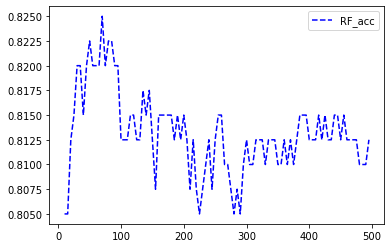

In [53]:
import matplotlib.pyplot as plt
plt.plot(range(10, 500, 5), scores, 'b--', label='RF_acc')
plt.legend()

In [55]:
from sklearn.metrics import precision_score, recall_score, f1_score

# accuracy, precision, recall, f1

In [56]:
print('< DT >')
print('accuracy:', accuracy_score(y_test, y_pred_dt))
print('precision:', precision_score(y_test, y_pred_dt))
print('recall: ', recall_score(y_test, y_pred_dt))
print('f1:', f1_score(y_test, y_pred_dt))

print('< RF >')
print('accuracy:', accuracy_score(y_test, y_pred_rf))
print('precision:', precision_score(y_test, y_pred_rf))
print('recall: ', recall_score(y_test, y_pred_rf))
print('f1:', f1_score(y_test, y_pred_rf))

< DT >
accuracy: 0.7275
precision: 0.7323943661971831
recall:  0.75
f1: 0.7410926365795726
< RF >
accuracy: 0.8125
precision: 0.8341708542713567
recall:  0.7980769230769231
f1: 0.8157248157248157


# ROC curve

In [60]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

## DecisionTree ROC

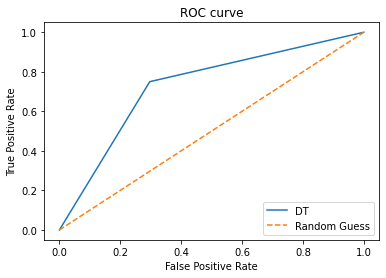

In [66]:
plt.plot(fpr1, tpr1, '-', ms=2, label='DT')
plt.plot([0,1], [0,1], '--', label='Random Guess')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

# RandomForest ROC

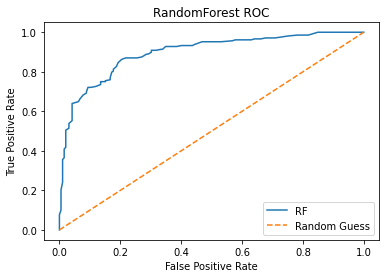

In [67]:
plt.plot(fpr2, tpr2, '-', label='RF')
plt.plot([0,1], [0,1], '--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForest ROC')
plt.legend()
plt.show()

# AUC

In [69]:
from sklearn.metrics import auc

In [70]:
roc_auc_DT = auc(fpr1, tpr1)
roc_auc_RF = auc(fpr2, tpr2)

In [71]:
print('DT auc: ', roc_auc_DT)
print('RF auc: ', roc_auc_RF)

DT auc:  0.7265625
RF auc:  0.895820813301282


### DT가 Positive, Negative 분류할 확률 74% /  RF는 87%

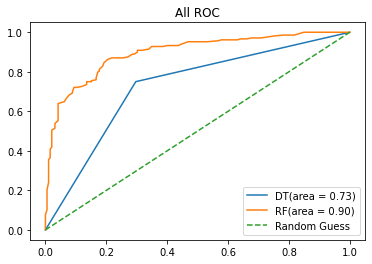

In [73]:
plt.plot(fpr1, tpr1, '-', label='DT(area = %.2f)'%roc_auc_DT)
plt.plot(fpr2, tpr2, '-', label='RF(area = %.2f)'%roc_auc_RF)
plt.plot([0,1], [0,1], '--', label='Random Guess')
plt.title('All ROC')
plt.legend()
plt.show()

---

# 합격여부 분류모델

In [89]:
st = pd.read_csv('/Users/hayeon/Downloads/student (1).csv')

In [90]:
st.head()

,gre,gpa,rank,sex,age,nationality,admit
0,380.0,3.61,3,f,19,Korea,불합격
1,660.0,3.67,3,f,18,Korea,NaN
2,800.0,4.00,1,m,19,Korea,합격
3,NaN,3.19,4,m,19,Korea,합격
4,520.0,2.93,4,f,19,Korea,불합격


In [91]:
st.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gre          398 non-null    float64
 1   gpa          398 non-null    float64
 2   rank         400 non-null    int64  
 3   sex          400 non-null    object 
 4   age          400 non-null    int64  
 5   nationality  400 non-null    object 
 6   admit        398 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 22.0+ KB


In [92]:
st.drop(['nationality'], axis=1, inplace=True)

In [93]:
st['sex'].replace({'f':0, 'm':1}, inplace=True)

In [94]:
st['admit'].replace({'불합격':0, '합격':1}, inplace=True)

In [99]:
#print(st[st['gre'].isnull()==True])
st['gre'].fillna(st['gre'].mean(), inplace=True)

In [102]:
#st[st['gpa'].isnull()==True]
st['gpa'].fillna(st['gpa'].mean(), inplace=True)

In [105]:
st.dropna(inplace=True)

In [107]:
st.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 0 to 399
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gre     398 non-null    float64
 1   gpa     398 non-null    float64
 2   rank    398 non-null    int64  
 3   sex     398 non-null    int64  
 4   age     398 non-null    int64  
 5   admit   398 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 21.8 KB


# Data split

In [109]:
X = st.drop(['admit'], axis=1)
y = st[['admit']]

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [111]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt = dt.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [114]:
print('dt acc: %.2f\n'%accuracy_score(y_test, y_pred_dt))
print('rf acc: %.2f\n'%accuracy_score(y_test, y_pred_rf))

print('dt confusion matrix\n', confusion_matrix(y_test, y_pred_dt))
print('rf confusion matrix\n', confusion_matrix(y_test, y_pred_rf))

print('\ndt classification: \n', classification_report(y_test, y_pred_dt))
print('rf classification: \n', classification_report(y_test, y_pred_rf))

dt acc: 0.65

rf acc: 0.76

dt confusion matrix
 [[57 19]
 [16  8]]
rf confusion matrix
 [[68  8]
 [16  8]]

dt classification: 
               precision    recall  f1-score   support

         0.0       0.78      0.75      0.77        76
         1.0       0.30      0.33      0.31        24

    accuracy                           0.65       100
   macro avg       0.54      0.54      0.54       100
weighted avg       0.66      0.65      0.66       100

rf classification: 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85        76
         1.0       0.50      0.33      0.40        24

    accuracy                           0.76       100
   macro avg       0.65      0.61      0.62       100
weighted avg       0.74      0.76      0.74       100



## 직접 계산하는 과정 (precision, recal, f1)

In [120]:
# precision 
prec_dt = 57 / (57 + 16) 
reca_dt = 57 / (57 + 19) 
print('DT precision', prec_dt)
print('DT recall', reca_dt)
print('f1', 2 * ((prec_dt*reca_dt)/(prec_dt+reca_dt)))

DT precision 0.7808219178082192
DT recall 0.75
f1 0.7651006711409396


In [125]:
fpr1, tpr1, ther1 = roc_curve(y_test, dt.predict_proba(X_test)[:, 1])
fpr2, tpr2, ther2 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

In [127]:
auc_dt = auc(fpr1, tpr1)
auc_rf = auc(fpr2, tpr2)

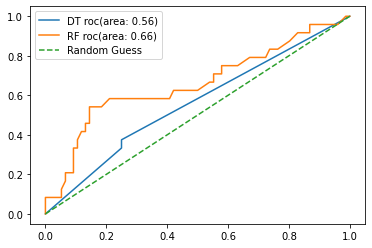

In [128]:
plt.plot(fpr1, tpr1, '-', label='DT roc(area: %.2f)'%auc_dt)
plt.plot(fpr2, tpr2, '-', label='RF roc(area: %.2f)'%auc_rf)
plt.plot([0,1], [0,1], '--', label='Random Guess')
plt.legend()
plt.show()

In [131]:
print('DT 모델이 클래스를 분류할 확률은: %.2f'%auc_dt, '%')
print('RF 모델이 클래스를 분류할 확률은: %.2f'%auc_rf, '%')

DT 모델이 클래스를 분류할 확률은: 0.56 %
RF 모델이 클래스를 분류할 확률은: 0.66 %


--- 
# 10주차
# LR

In [134]:
df = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/heights.csv')

In [136]:
df

,father,son
0,165.223215,151.836806
1,160.657388,160.563662
2,164.986513,160.889747
3,167.011350,159.492645
4,155.288564,163.274070
...,...,...
1073,170.171897,179.710893
1074,181.182797,173.400060
1075,182.329176,176.036961
1076,179.675460,176.027055


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078 entries, 0 to 1077
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   father  1078 non-null   float64
 1   son     1078 non-null   float64
dtypes: float64(2)
memory usage: 17.0 KB


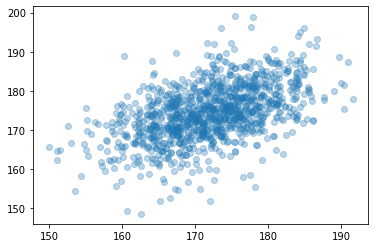

In [142]:
plt.scatter(df['father'], df['son'], alpha=0.3)

# 데이터 분리

In [143]:
X = df[['father']]
y = df[['son']]

X_train, X_test, y_train, y_test = train_test_split(X, y)

# 모델링

In [144]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# 성능평가

In [145]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print('mae: %.2f' % mae)
print('mse: %.2f' % mse)
print('rmse: %.2f' % rmse)
print('r2: %.2f' % r2)

mae: 5.14
mse: 44.69
rmse: 6.69
r2: 0.21


---

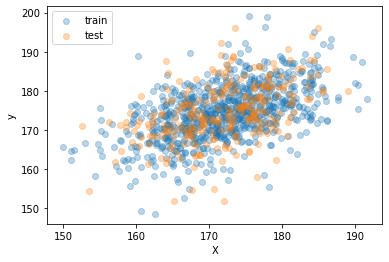

In [148]:
plt.scatter(X_train, y_train, label='train', alpha=0.3)
plt.scatter(X_test, y_test, label='test', alpha=0.3)
plt.legend()
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [149]:
lr.coef_, lr.intercept_

(array([[0.51194723]]), array([86.352024]))

### 새로운 값을 넣으면 예측값을 반환하는 함수 작성

In [150]:
f = lambda x: lr.intercept_ + (lr.coef_ * x)

# 시각화

### X_train의 시각화

In [160]:
x = np.array([min(X_train['father']), max(X_train['father'])])
x

array([149.88032  , 191.6021822])

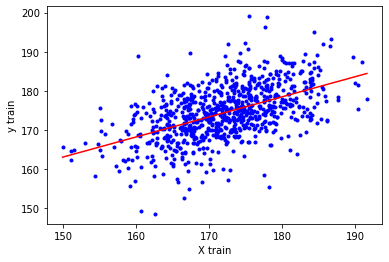

In [167]:
plt.plot(X_train, y_train, 'b.')
plt.xlabel('X train')
plt.ylabel('y train')
plt.plot(x, f(x).reshape(2,), 'r')

### X_test의 시각화

In [170]:
x = np.array([min(X_test['father']), max(X_test['father'])])
x

array([152.4872744, 188.999241 ])

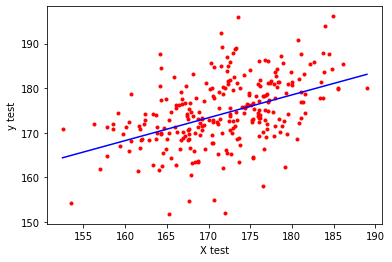

In [174]:
plt.plot(X_test, y_test, 'r.')
plt.plot(x, f(x).reshape(2,), 'b')
plt.xlabel('X test')
plt.ylabel('y test')
plt.show()

---
# LR_Manhattan

In [177]:
df = pd.read_csv('/Users/hayeon/Downloads/manhattan.csv')

In [178]:
df.head()

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


# 데이터 분리

In [181]:
X = df[['bedrooms', 'bathrooms', 'size_sqft', 'floor']]
y = df[['rent']]

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [183]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [184]:
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_lr)

print('mse: %.2f'% mae)
print('mse: %.2f'% mse)
print('rmse: %.2f'% rmse)
print('r2: %.2f'%r2)

mse: 945.44
mse: 2085018.64
rmse: 1443.96
r2: 0.79


In [185]:
lr.coef_, lr.intercept_

(array([[-373.34806714, 1288.32859354,    4.78088128,   33.20815913]]),
 array([-1015.53945445]))

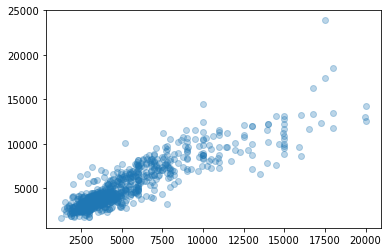

In [186]:
plt.scatter(y_test, y_pred_lr, alpha=0.3)

# 변수와 라벨 상관관계

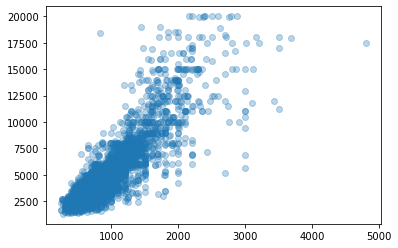

In [187]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.3)

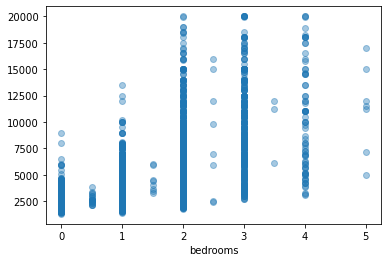

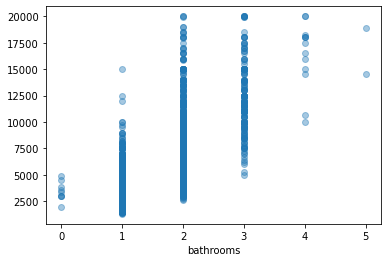

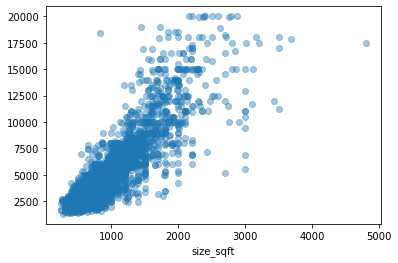

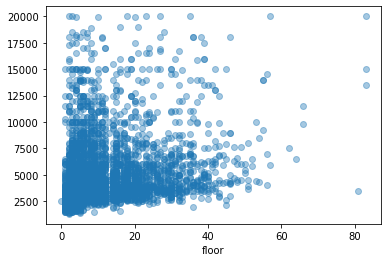

In [189]:
for i in range(0, len(X.columns)):
    plt.scatter(X[[X.columns[i]]], df[['rent']], alpha=0.4)
    plt.xlabel(X.columns[i])
    plt.show()

# 11주차 KMeans

In [190]:
from sklearn.cluster import KMeans

In [191]:
import seaborn as sns
df = sns.load_dataset('iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [192]:
X = df.drop('species', axis=1)

In [193]:
y = df[['species']]

In [194]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

# cluster 개수 구하기

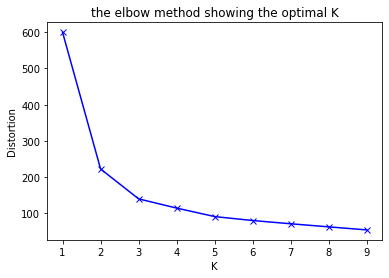

In [195]:
inertia_arr = []
K = range(1,10)

for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(X_scaled)
    inertia = km.inertia_
    inertia_arr.append(inertia)

plt.plot(K, inertia_arr, 'bx-')
plt.xlabel("K")
plt.ylabel('Distortion')
plt.title('the elbow method showing the optimal K')
plt.show()

### 최적 클러스터 개수 = 3
* 완만한 경사를 보이는 SSE를 보이는 부분에 해당하는 클러스터가 3이다. 


In [196]:
km = KMeans(n_clusters=3)
km.fit(X_scaled)

KMeans(n_clusters=3)

In [197]:
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [199]:
df['cluster_id_pred'] = km.labels_
df

,sepal_length,sepal_width,petal_length,petal_width,species,cluster_id_pred
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,2
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


# 차원축소 PCA

In [200]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X_scaled)
df_pca = pca.transform(X_scaled)

print('축소전: ', X_scaled.shape)
print('축소후: ', df_pca.shape)

축소전:  (150, 4)
축소후:  (150, 2)


In [201]:
df_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

In [202]:
cols = ['pc1', 'pc2']
df_pca = pd.DataFrame(data = df_pca, columns=cols)
df_pca

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [204]:
df_pca['species'] = df['species']
df_pca['pred'] = df['cluster_id_pred']

In [205]:
df_pca

,pc1,pc2,species,pred
0,-2.264703,0.480027,setosa,1
1,-2.080961,-0.674134,setosa,1
2,-2.364229,-0.341908,setosa,1
3,-2.299384,-0.597395,setosa,1
4,-2.389842,0.646835,setosa,1
...,...,...,...,...
145,1.870503,0.386966,virginica,0
146,1.564580,-0.896687,virginica,2
147,1.521170,0.269069,virginica,0
148,1.372788,1.011254,virginica,0


# 시각화

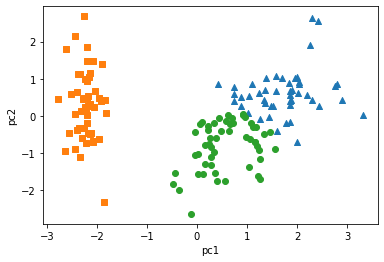

In [207]:
marker = ['^', 's', 'o']

for i, marker in enumerate(marker):
    x_val = df_pca[df_pca['pred']==i]['pc1'] # 0, 1, 2 클래스 별 Pc1, pc2 값
    y_val = df_pca[df_pca['pred']==i]['pc2']
    plt.scatter(x_val, y_val, marker=marker) 
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

> * 0/1/2클래스일 때의 pc1 값, pc2값을 각각 x, y로 저장함. 
> * 좌표 상에 0/1/2 클래스의 좌표들을 다른 마커로 각각 찍어줌
#### -> 시각화해보니까 지들끼리 좀 모여있네

In [213]:
df_pca['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [230]:
df_pca.species.replace({'setosa':1, 'virginica':0, 'versicolor':2}, inplace=True)

In [231]:
df_pca

,pc1,pc2,species,pred
0,-2.264703,0.480027,0,1
1,-2.080961,-0.674134,0,1
2,-2.364229,-0.341908,0,1
3,-2.299384,-0.597395,0,1
4,-2.389842,0.646835,0,1
...,...,...,...,...
145,1.870503,0.386966,2,0
146,1.564580,-0.896687,2,2
147,1.521170,0.269069,2,0
148,1.372788,1.011254,2,0


In [232]:
acc = 0
for i in range(len(df_pca)):
    if df_pca['species'][i]==df_pca['pred'][i]:
        acc = acc+1
result = acc / len(df_pca)
print('정확도: %.3f' % result)

정확도: 0.353


# mae, mse, rmse 식
### 선형식 y = 2x + 50
#### 예측값 (2,51), (3,56), (5,63), (6,60), (10,72)
#### 실제 식에 대입한 결과 값 54 56 60 62 70

- mae : 오차 합 / 전체개수 
    * (3+0+3+2+2) / 2 = 2
- mse : 오차제곱합 / 전체개수 
    * (9+0+9+4+4) / 5 = 5.2
- rmse : mse의 제곱근
    * 5.2의 제곱 = 2.280~

# 12주차 연관분석

In [245]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [246]:
data = [['겨울왕국', '미녀와 야수', '쥬라기 월드', '아바타', '타이타닉'],
       ['스타워즈', '어벤져스', '아이언맨'],
       ['분노의 질주', '어벤져스'],
       ['스타워즈', '아바타', '라이온 킹', '어벤져스'],
       ['쥬라기 월드', '아바타', '해리포터'],
       ['스타워즈', '겨울왕국', '미녀와 야수', '라이온 킹', '타이타닉'],
       ['스타워즈', '어벤져스', '분노의 질주', '쥬라기 월드']]

In [247]:
te = TransactionEncoder()
te_ary = te.fit_transform(data)
te_ary

array([[ True, False,  True, False, False,  True, False, False,  True,
         True, False],
       [False, False, False, False,  True, False,  True,  True, False,
        False, False],
       [False, False, False,  True, False, False, False,  True, False,
        False, False],
       [False,  True, False, False,  True,  True, False,  True, False,
        False, False],
       [False, False, False, False, False,  True, False, False,  True,
        False,  True],
       [ True,  True,  True, False,  True, False, False, False, False,
         True, False],
       [False, False, False,  True,  True, False, False,  True,  True,
        False, False]])

In [249]:
te.columns_

['겨울왕국',
 '라이온 킹',
 '미녀와 야수',
 '분노의 질주',
 '스타워즈',
 '아바타',
 '아이언맨',
 '어벤져스',
 '쥬라기 월드',
 '타이타닉',
 '해리포터']

In [254]:
df = pd.DataFrame(te_ary, columns=te.columns_)

In [255]:
df

,겨울왕국,라이온 킹,미녀와 야수,분노의 질주,스타워즈,아바타,아이언맨,어벤져스,쥬라기 월드,타이타닉,해리포터
0,True,False,True,False,False,True,False,False,True,True,False
1,False,False,False,False,True,False,True,True,False,False,False
2,False,False,False,True,False,False,False,True,False,False,False
3,False,True,False,False,True,True,False,True,False,False,False
4,False,False,False,False,False,True,False,False,True,False,True
5,True,True,True,False,True,False,False,False,False,True,False
6,False,False,False,True,True,False,False,True,True,False,False


# support 지지도

In [258]:
frequent_itemsets = apriori(df, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.571429,(스타워즈)
1,0.571429,(어벤져스)


In [261]:
frequent_itemsets = apriori(df, use_colnames=True, min_support = 0.23).sort_values('support', ascending=False)

# Confidence 신뢰도
### min_threshold 지정하면 지정값 이상의 신뢰도를 가진 행만 보여줌

In [263]:
association_rules(frequent_itemsets, metric='confidence',
                  min_threshold=0.5).sort_values(['support', 'confidence'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(어벤져스),(스타워즈),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286
1,(스타워즈),(어벤져스),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286
2,(라이온 킹),(스타워즈),0.285714,0.571429,0.285714,1.000000,1.750000,0.122449,inf
7,(분노의 질주),(어벤져스),0.285714,0.571429,0.285714,1.000000,1.750000,0.122449,inf
8,(미녀와 야수),(타이타닉),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
9,(타이타닉),(미녀와 야수),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
10,(겨울왕국),(타이타닉),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
11,(타이타닉),(겨울왕국),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
12,(겨울왕국),(미녀와 야수),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
13,(미녀와 야수),(겨울왕국),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf


# Lift 향상도

In [267]:
association_rules(frequent_itemsets, metric='lift').sort_values(['support', 'confidence', 'lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(어벤져스),(스타워즈),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286
1,(스타워즈),(어벤져스),0.571429,0.571429,0.428571,0.750000,1.312500,0.102041,1.714286
8,(미녀와 야수),(타이타닉),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
9,(타이타닉),(미녀와 야수),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
10,(겨울왕국),(타이타닉),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
11,(타이타닉),(겨울왕국),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
12,(겨울왕국),(미녀와 야수),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
13,(미녀와 야수),(겨울왕국),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
14,"(겨울왕국, 타이타닉)",(미녀와 야수),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf
15,"(겨울왕국, 미녀와 야수)",(타이타닉),0.285714,0.285714,0.285714,1.000000,3.500000,0.204082,inf


--- 
# 타이타닉

In [268]:
df = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/titanic.csv', index_col=0)

In [269]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [282]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

df['Age'].fillna(df.Age.median(), inplace=True)

df.Sex.replace({'female':0, 'male':1}, inplace=True)

In [283]:
X = df.drop('Survived', axis=1)

In [284]:
y = df[['Survived']]

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [295]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [296]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
print('acc', accuracy_score(y_test, y_pred))

acc 0.8161434977578476


### 변수중요도

In [301]:
pd.DataFrame(tree.feature_importances_.reshape((1,-1)), index=['feature_importance'],
            columns = X.columns)

,Pclass,Sex,Age,SibSp,Parch,Fare
feature_importance,0.089937,0.30135,0.258628,0.064709,0.019483,0.265893


# 원핫인코딩

In [328]:
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/Users/hayeon/Downloads/2021-2(3-2)/머신러닝/data/titanic.csv', index_col=0)
    
    

In [329]:
df.Sex.replace({'female':0, 'male':1}, inplace=True)
df.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [330]:
df.Age.fillna(df.Age.median(), inplace=True)
df.dropna(inplace=True)

In [331]:
df = df.reset_index(drop=True)

In [332]:
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.25,S


In [337]:
encoder = OneHotEncoder()

onehot = encoder.fit_transform(df[['Embarked']])
onehot = onehot.toarray()
onehot


array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [341]:
pd.DataFrame(onehot, columns=encoder.get_feature_names())

,x0_C,x0_Q,x0_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


In [345]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,S
885,1,1,0,19.0,0,0,30.0000,S
886,0,3,0,28.0,1,2,23.4500,S
887,1,1,1,26.0,0,0,30.0000,C


In [346]:
onehot = pd.DataFrame(onehot, columns=['C','Q','S'])

In [347]:
onehot

,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
884,0.0,0.0,1.0
885,0.0,0.0,1.0
886,0.0,0.0,1.0
887,1.0,0.0,0.0


#### 원래의 데이터 프레임과 비교해보면, 0행은 S, 1행은 C니까 원핫 데이터프레임에서2컬럼이 S고 0컬럼이 C임을 알 수 있음 (컬럼이름지정)
#### get_feature_name() 하면 자동으로 이름 맞춰줌

In [356]:
onehot_all = pd.concat([df, onehot], axis=1)
onehot_all

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,C,Q,S
0,0,3,1,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,S,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,S,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,S,0.0,0.0,1.0
886,0,3,0,28.0,1,2,23.4500,S,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,C,1.0,0.0,0.0


In [357]:
df2 = onehot_all.drop(['Embarked'], axis=1)

In [358]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,0,3,1,22.0,1,0,7.2500,0.0,0.0,1.0
1,1,1,0,38.0,1,0,71.2833,1.0,0.0,0.0
2,1,3,0,26.0,0,0,7.9250,0.0,0.0,1.0
3,1,1,0,35.0,1,0,53.1000,0.0,0.0,1.0
4,0,3,1,35.0,0,0,8.0500,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
884,0,2,1,27.0,0,0,13.0000,0.0,0.0,1.0
885,1,1,0,19.0,0,0,30.0000,0.0,0.0,1.0
886,0,3,0,28.0,1,2,23.4500,0.0,0.0,1.0
887,1,1,1,26.0,0,0,30.0000,1.0,0.0,0.0


In [359]:
X = df2.drop(['Survived'], axis=1)
y = df2[['Survived']]

X_train, X_test, y_train, y_test = train_test_split(X,y)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(acc)

0.8071748878923767


In [370]:
pd.DataFrame(tree.feature_importances_.reshape(1, -1), index=['feature_importance'],
            columns=X.columns)

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
feature_importance,0.083847,0.299628,0.285872,0.042329,0.024346,0.230506,0.001005,0.005723,0.026744
